#### Mini Project: Predicting Sports Performance using Linear Regression and Logistic Regression


#### Problem Statement
 This project aims to predict player or team performance using past game data and key metrics. It helps improve decisions like selecting players and planning strategies.

### Data Collection: 
Use the Kaggle Sports Performance predicto which contains. Download if from Kaggle.
#### https://www.kaggle.com/datasets/willianoliveiragibin/odi-cricket-data

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r"C:\Users\kavya\Downloads\archive\ODI Cricket Data new.csv")

In [4]:
data

,player_name,role,total_runs,strike_rate,total_balls_faced,total_wickets_taken,total_runs_conceded,total_overs_bowled,total_matches_played,matches_played_as_batter,matches_played_as_bowler,matches_won,matches_lost,player_of_match_awards,team,average,percentage
0,V Kohli,Batter,13784,9.170.381.212.161.530,15031,7,681,671,579,579,0,360,219,41,India,1.969.142.857.142.850,"477,93%"
1,KC Sangakkara,Batter,11618,7.939.046.057.127.230,14634,0,0,0,510,510,0,237,273,26,Sri Lanka,0,"442,17%"
2,RG Sharma,Batter,10646,9.035.817.348.497.700,11782,11,538,614,577,577,0,358,219,23,India,9.678.181.818.181.810,"474,25%"
3,MS Dhoni,Batter,10274,8.497.932.175.351.530,12090,1,32,38,575,575,0,356,219,20,India,10274.0,"458,87%"
4,AB de Villiers,Batter,9435,9.944.139.966.273.180,9488,7,205,201,466,466,0,286,180,26,South Africa,1.347.857.142.857.140,"497,97%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,C Sakariya,Batter,0,0.0,1,2,34,51,75,75,0,41,34,0,India,0.0,"0,00%"
1536,Shahriar Hossain,Batter,0,0.0,3,0,0,0,40,40,0,11,29,0,Bangladesh,0,"0,00%"
1537,Salman Faris,Batter,0,0.0,2,0,0,0,8,8,0,3,5,0,United Arab Emirates,0,"0,00%"
1538,Haseebullah Khan,Batter,0,0.0,2,0,0,0,12,12,0,6,6,0,Pakistan,0,"0,00%"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   player_name               1540 non-null   object
 1   role                      1540 non-null   object
 2   total_runs                1540 non-null   int64 
 3   strike_rate               1540 non-null   object
 4   total_balls_faced         1540 non-null   int64 
 5   total_wickets_taken       1540 non-null   int64 
 6   total_runs_conceded       1540 non-null   int64 
 7   total_overs_bowled        1540 non-null   int64 
 8   total_matches_played      1540 non-null   int64 
 9   matches_played_as_batter  1540 non-null   int64 
 10  matches_played_as_bowler  1540 non-null   int64 
 11  matches_won               1540 non-null   int64 
 12  matches_lost              1540 non-null   int64 
 13  player_of_match_awards    1540 non-null   int64 
 14  team                    

In [6]:
data.head()

,player_name,role,total_runs,strike_rate,total_balls_faced,total_wickets_taken,total_runs_conceded,total_overs_bowled,total_matches_played,matches_played_as_batter,matches_played_as_bowler,matches_won,matches_lost,player_of_match_awards,team,average,percentage
0,V Kohli,Batter,13784,9.170.381.212.161.530,15031,7,681,671,579,579,0,360,219,41,India,1.969.142.857.142.850,"477,93%"
1,KC Sangakkara,Batter,11618,7.939.046.057.127.230,14634,0,0,0,510,510,0,237,273,26,Sri Lanka,0,"442,17%"
2,RG Sharma,Batter,10646,9.035.817.348.497.700,11782,11,538,614,577,577,0,358,219,23,India,9.678.181.818.181.810,"474,25%"
3,MS Dhoni,Batter,10274,8.497.932.175.351.530,12090,1,32,38,575,575,0,356,219,20,India,10274.0,"458,87%"
4,AB de Villiers,Batter,9435,9.944.139.966.273.180,9488,7,205,201,466,466,0,286,180,26,South Africa,1.347.857.142.857.140,"497,97%"


In [7]:
data.tail()

,player_name,role,total_runs,strike_rate,total_balls_faced,total_wickets_taken,total_runs_conceded,total_overs_bowled,total_matches_played,matches_played_as_batter,matches_played_as_bowler,matches_won,matches_lost,player_of_match_awards,team,average,percentage
1535,C Sakariya,Batter,0,0.0,1,2,34,51,75,75,0,41,34,0,India,0.0,"0,00%"
1536,Shahriar Hossain,Batter,0,0.0,3,0,0,0,40,40,0,11,29,0,Bangladesh,0,"0,00%"
1537,Salman Faris,Batter,0,0.0,2,0,0,0,8,8,0,3,5,0,United Arab Emirates,0,"0,00%"
1538,Haseebullah Khan,Batter,0,0.0,2,0,0,0,12,12,0,6,6,0,Pakistan,0,"0,00%"
1539,Syeda Aroob Shah,Batter,0,0.0,1,0,0,0,5,5,0,4,1,0,Pakistan,0,"0,00%"


In [8]:
data.describe()

,total_runs,total_balls_faced,total_wickets_taken,total_runs_conceded,total_overs_bowled,total_matches_played,matches_played_as_batter,matches_played_as_bowler,matches_won,matches_lost,player_of_match_awards
count,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.0,1540.000000,1540.000000,1540.000000
mean,632.378571,811.675325,10.916883,338.899351,411.766883,289.495455,289.495455,0.0,148.452597,141.042857,1.231169
std,1319.024544,1582.382450,27.927542,818.552241,994.989809,190.897887,190.897887,0.0,118.579297,85.976096,3.061393
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000
25%,28.000000,54.000000,0.000000,0.000000,0.000000,79.000000,79.000000,0.0,30.750000,47.000000,0.000000
50%,136.000000,211.000000,0.000000,22.500000,24.000000,329.000000,329.000000,0.0,137.500000,162.500000,0.000000
75%,586.000000,770.000000,7.000000,240.750000,288.250000,463.000000,463.000000,0.0,236.000000,212.000000,1.000000
max,13784.000000,15031.000000,343.000000,9518.000000,10803.000000,580.000000,580.000000,0.0,381.000000,275.000000,41.000000


In [9]:
data.ndim

2

In [10]:
data.columns

Index(['player_name', 'role', 'total_runs', 'strike_rate', 'total_balls_faced',
       'total_wickets_taken', 'total_runs_conceded', 'total_overs_bowled',
       'total_matches_played', 'matches_played_as_batter',
       'matches_played_as_bowler', 'matches_won', 'matches_lost',
       'player_of_match_awards', 'team', 'average', 'percentage'],
      dtype='object')

#### Handling Missing Data

In [11]:
data.isnull()

,player_name,role,total_runs,strike_rate,total_balls_faced,total_wickets_taken,total_runs_conceded,total_overs_bowled,total_matches_played,matches_played_as_batter,matches_played_as_bowler,matches_won,matches_lost,player_of_match_awards,team,average,percentage
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1536,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1537,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1538,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data.isnull().sum()

player_name                 0
role                        0
total_runs                  0
strike_rate                 0
total_balls_faced           0
total_wickets_taken         0
total_runs_conceded         0
total_overs_bowled          0
total_matches_played        0
matches_played_as_batter    0
matches_played_as_bowler    0
matches_won                 0
matches_lost                0
player_of_match_awards      0
team                        0
average                     0
percentage                  0
dtype: int64

In [13]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1535    False
1536    False
1537    False
1538    False
1539    False
Length: 1540, dtype: bool

In [14]:
data.duplicated().sum()

0

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data

,player_name,role,total_runs,strike_rate,total_balls_faced,total_wickets_taken,total_runs_conceded,total_overs_bowled,total_matches_played,matches_played_as_batter,matches_played_as_bowler,matches_won,matches_lost,player_of_match_awards,team,average,percentage
0,V Kohli,Batter,13784,9.170.381.212.161.530,15031,7,681,671,579,579,0,360,219,41,India,1.969.142.857.142.850,"477,93%"
1,KC Sangakkara,Batter,11618,7.939.046.057.127.230,14634,0,0,0,510,510,0,237,273,26,Sri Lanka,0,"442,17%"
2,RG Sharma,Batter,10646,9.035.817.348.497.700,11782,11,538,614,577,577,0,358,219,23,India,9.678.181.818.181.810,"474,25%"
3,MS Dhoni,Batter,10274,8.497.932.175.351.530,12090,1,32,38,575,575,0,356,219,20,India,10274.0,"458,87%"
4,AB de Villiers,Batter,9435,9.944.139.966.273.180,9488,7,205,201,466,466,0,286,180,26,South Africa,1.347.857.142.857.140,"497,97%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,C Sakariya,Batter,0,0.0,1,2,34,51,75,75,0,41,34,0,India,0.0,"0,00%"
1536,Shahriar Hossain,Batter,0,0.0,3,0,0,0,40,40,0,11,29,0,Bangladesh,0,"0,00%"
1537,Salman Faris,Batter,0,0.0,2,0,0,0,8,8,0,3,5,0,United Arab Emirates,0,"0,00%"
1538,Haseebullah Khan,Batter,0,0.0,2,0,0,0,12,12,0,6,6,0,Pakistan,0,"0,00%"


In [17]:
data = pd.get_dummies(data, drop_first=True)

In [18]:
data

,total_runs,total_balls_faced,total_wickets_taken,total_runs_conceded,total_overs_bowled,total_matches_played,matches_played_as_batter,matches_played_as_bowler,matches_won,matches_lost,...,"percentage_625,00%","percentage_647,06%","percentage_652,17%","percentage_666,67%","percentage_71,43%","percentage_714,29%","percentage_766,67%","percentage_80,00%","percentage_83,33%","percentage_90,91%"
0,13784,15031,7,681,671,579,579,0,360,219,...,False,False,False,False,False,False,False,False,False,False
1,11618,14634,0,0,0,510,510,0,237,273,...,False,False,False,False,False,False,False,False,False,False
2,10646,11782,11,538,614,577,577,0,358,219,...,False,False,False,False,False,False,False,False,False,False
3,10274,12090,1,32,38,575,575,0,356,219,...,False,False,False,False,False,False,False,False,False,False
4,9435,9488,7,205,201,466,466,0,286,180,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,0,1,2,34,51,75,75,0,41,34,...,False,False,False,False,False,False,False,False,False,False
1536,0,3,0,0,0,40,40,0,11,29,...,False,False,False,False,False,False,False,False,False,False
1537,0,2,0,0,0,8,8,0,3,5,...,False,False,False,False,False,False,False,False,False,False
1538,0,2,0,0,0,12,12,0,6,6,...,False,False,False,False,False,False,False,False,False,False


In [19]:
data.describe()

,total_runs,total_balls_faced,total_wickets_taken,total_runs_conceded,total_overs_bowled,total_matches_played,matches_played_as_batter,matches_played_as_bowler,matches_won,matches_lost,player_of_match_awards
count,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.0,1540.000000,1540.000000,1540.000000
mean,632.378571,811.675325,10.916883,338.899351,411.766883,289.495455,289.495455,0.0,148.452597,141.042857,1.231169
std,1319.024544,1582.382450,27.927542,818.552241,994.989809,190.897887,190.897887,0.0,118.579297,85.976096,3.061393
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000
25%,28.000000,54.000000,0.000000,0.000000,0.000000,79.000000,79.000000,0.0,30.750000,47.000000,0.000000
50%,136.000000,211.000000,0.000000,22.500000,24.000000,329.000000,329.000000,0.0,137.500000,162.500000,0.000000
75%,586.000000,770.000000,7.000000,240.750000,288.250000,463.000000,463.000000,0.0,236.000000,212.000000,1.000000
max,13784.000000,15031.000000,343.000000,9518.000000,10803.000000,580.000000,580.000000,0.0,381.000000,275.000000,41.000000


#### Mean, Median and Mode

In [20]:
# Mean
mean_values = data.mean(numeric_only=True)
print("Mean:", mean_values)

# Median
median_values = data.median(numeric_only=True)
print("Median:", median_values)

# Mode
mode_values = data.mode()
print("Mode:", mode_values)

Mean: total_runs             632.378571
total_balls_faced      811.675325
total_wickets_taken     10.916883
total_runs_conceded    338.899351
total_overs_bowled     411.766883
                          ...    
percentage_714,29%       0.000649
percentage_766,67%       0.000649
percentage_80,00%        0.000649
percentage_83,33%        0.000649
percentage_90,91%        0.001948
Length: 4688, dtype: float64
Median: total_runs             136.0
total_balls_faced      211.0
total_wickets_taken      0.0
total_runs_conceded     22.5
total_overs_bowled      24.0
                       ...  
percentage_714,29%       0.0
percentage_766,67%       0.0
percentage_80,00%        0.0
percentage_83,33%        0.0
percentage_90,91%        0.0
Length: 4688, dtype: float64
Mode:    total_runs  total_balls_faced  total_wickets_taken  total_runs_conceded  \
0         0.0                3.0                  0.0                  0.0   
1         NaN                NaN                  NaN                  Na

#### Matrix

In [21]:
#using correlation
numeric_data = data.select_dtypes(include='number') 
correlation_matrix = numeric_data.corr()
print("Correlation Matrix:", correlation_matrix)

Correlation Matrix:                           total_runs  total_balls_faced  total_wickets_taken  \
total_runs                  1.000000           0.991749             0.162302   
total_balls_faced           0.991749           1.000000             0.158276   
total_wickets_taken         0.162302           0.158276             1.000000   
total_runs_conceded         0.212444           0.206872             0.975256   
total_overs_bowled          0.208563           0.204475             0.980503   
total_matches_played        0.332227           0.327474             0.208592   
matches_played_as_batter    0.332227           0.327474             0.208592   
matches_played_as_bowler         NaN                NaN                  NaN   
matches_won                 0.325753           0.312041             0.198316   
matches_lost                0.288382           0.296740             0.189628   
player_of_match_awards      0.914135           0.889682             0.313684   

                   

#### Data Analysis and Visualization

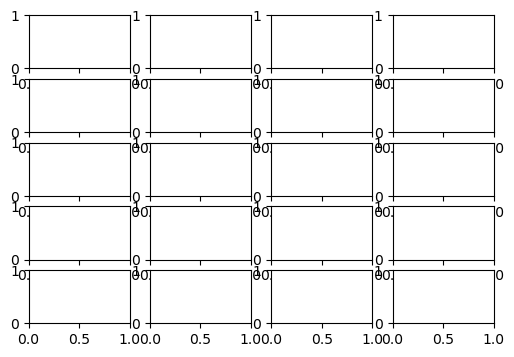

In [22]:
 import matplotlib.pyplot as plt

 fig, axs = plt.subplots(5, 4, figsize=(6,4))

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Columns: 4688 entries, total_runs to percentage_90,91%
dtypes: bool(4677), int64(11)
memory usage: 7.0 MB


#### Line Plot

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

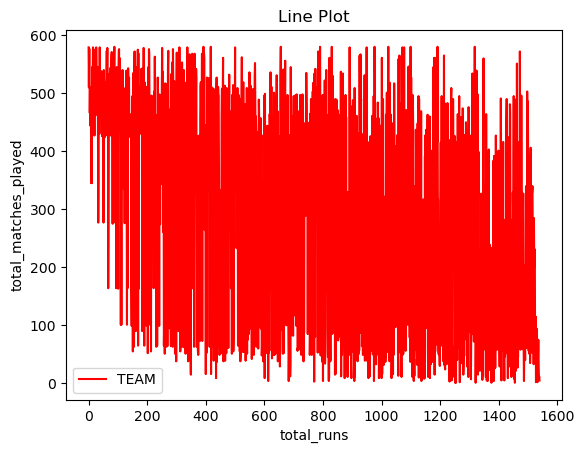

In [25]:
plt.plot(data.index, data['total_matches_played'], label='TEAM', color='r')
plt.title('Line Plot')
plt.xlabel('total_runs')
plt.ylabel('total_matches_played')
plt.legend()
plt.show()

#### Heatmap

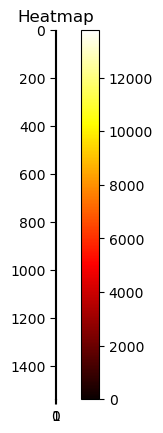

In [26]:
data = data[['total_matches_played', 'total_runs']].values
plt.imshow(data, cmap='hot')
plt.title('Heatmap')
plt.colorbar()
plt.show()

#### Scatter Plot

Index(['player_name', 'role', 'total_runs', 'strike_rate', 'total_balls_faced',
       'total_wickets_taken', 'total_runs_conceded', 'total_overs_bowled',
       'total_matches_played', 'matches_played_as_batter',
       'matches_played_as_bowler', 'matches_won', 'matches_lost',
       'player_of_match_awards', 'team', 'average', 'percentage'],
      dtype='object')


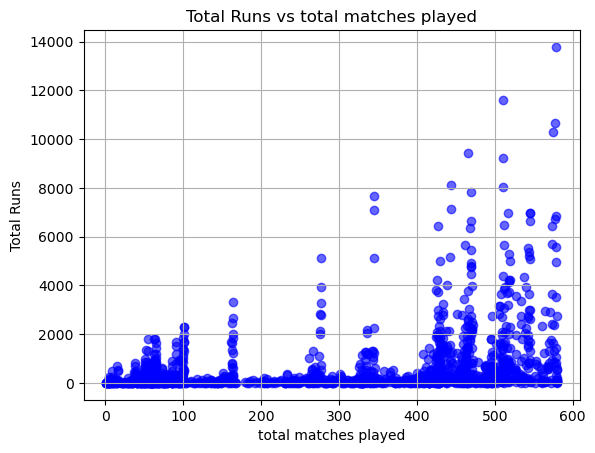

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\kavya\Downloads\archive\ODI Cricket Data new.csv")

print(data.columns)

plt.scatter(data['total_matches_played'], data['total_runs'], color='blue', alpha=0.6)
plt.title("Total Runs vs total matches played")
plt.xlabel("total matches played")
plt.ylabel("Total Runs")
plt.grid(True)
plt.show()

#### Bar Chart

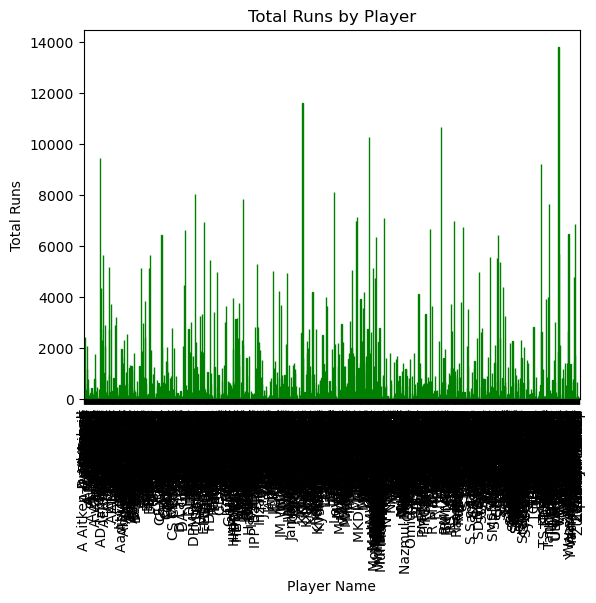

In [28]:
grouped_data = data.groupby('player_name')['total_runs'].sum()
grouped_data.plot(kind='bar', color='blue', edgecolor='green')
plt.title("Total Runs by Player")
plt.xlabel("Player Name")
plt.ylabel("Total Runs")
plt.show()


#### HeatMap

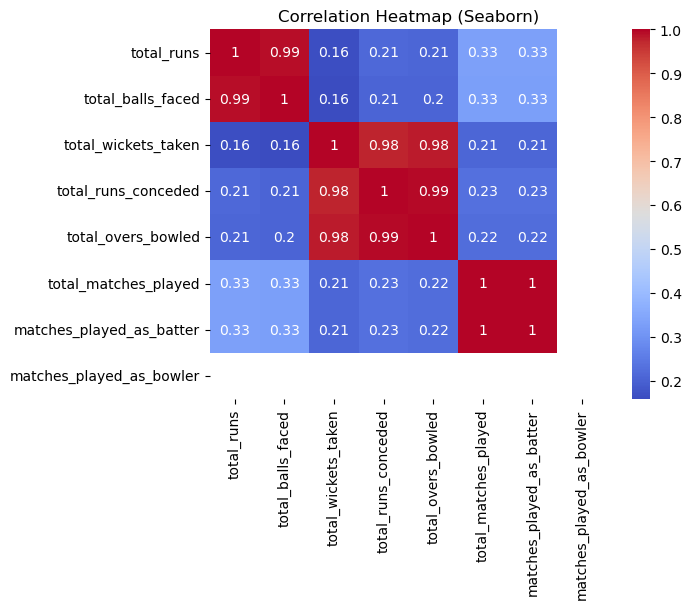

In [29]:
correlation_matrix = data[['total_runs', 'total_balls_faced',	'total_wickets_taken', 'total_runs_conceded', 
                           'total_overs_bowled', 'total_matches_played', 'matches_played_as_batter', 'matches_played_as_bowler']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Seaborn)')
plt.show()

#### Matplotlib

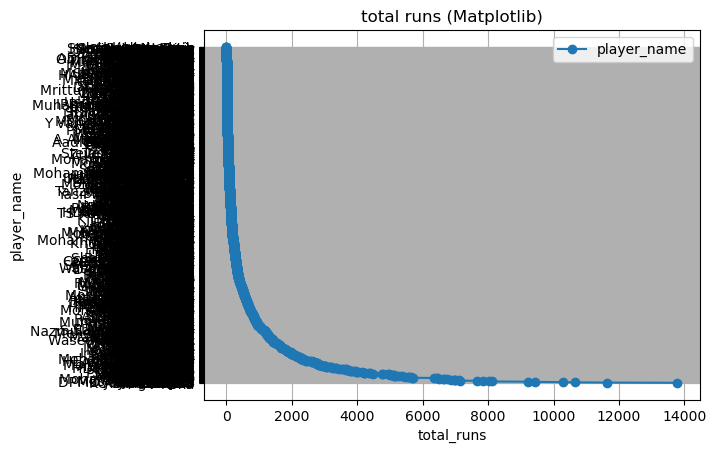

In [30]:
import matplotlib.pyplot as plt

plt.plot(data['total_runs'], data['player_name'], marker='o', label='player_name')
plt.xlabel('total_runs')
plt.ylabel('player_name')
plt.title('total runs (Matplotlib)')
plt.legend()
plt.grid()
plt.show()

#### Pie chart

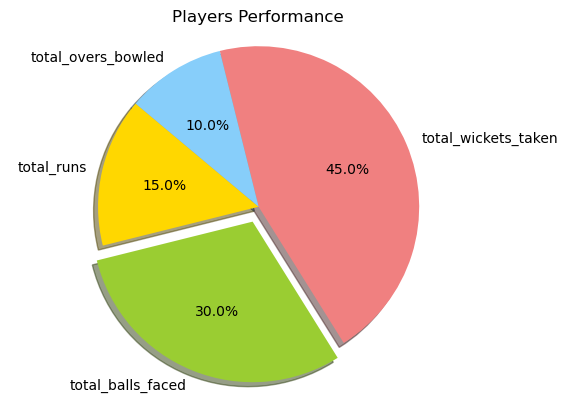

In [31]:
import matplotlib.pyplot as plt

labels = ['total_runs',	'total_balls_faced', 'total_wickets_taken',	'total_overs_bowled']
sizes = [15, 30, 45, 10]  
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0.1, 0, 0) 


plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  
plt.title("Players Performance")

plt.show()


#### Linear Regression

In [32]:
X = data[['total_runs', 'total_balls_faced', 'total_wickets_taken', 'total_runs_conceded', 'total_overs_bowled',
              'total_matches_played', 'matches_played_as_batter', 'matches_played_as_bowler','matches_won',	'matches_lost']]
Y = data['player_of_match_awards']

In [33]:
X

,total_runs,total_balls_faced,total_wickets_taken,total_runs_conceded,total_overs_bowled,total_matches_played,matches_played_as_batter,matches_played_as_bowler,matches_won,matches_lost
0,13784,15031,7,681,671,579,579,0,360,219
1,11618,14634,0,0,0,510,510,0,237,273
2,10646,11782,11,538,614,577,577,0,358,219
3,10274,12090,1,32,38,575,575,0,356,219
4,9435,9488,7,205,201,466,466,0,286,180
...,...,...,...,...,...,...,...,...,...,...
1535,0,1,2,34,51,75,75,0,41,34
1536,0,3,0,0,0,40,40,0,11,29
1537,0,2,0,0,0,8,8,0,3,5
1538,0,2,0,0,0,12,12,0,6,6


In [34]:
Y

0       41
1       26
2       23
3       20
4       26
        ..
1535     0
1536     0
1537     0
1538     0
1539     0
Name: player_of_match_awards, Length: 1540, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [37]:
X_train

,total_runs,total_balls_faced,total_wickets_taken,total_runs_conceded,total_overs_bowled,total_matches_played,matches_played_as_batter,matches_played_as_bowler,matches_won,matches_lost
937,77,107,0,0,0,50,50,0,17,33
756,141,143,0,0,0,87,87,0,26,61
1431,3,6,0,0,0,9,9,0,4,5
690,174,265,168,3792,5095,545,545,0,381,164
418,508,628,3,89,110,16,16,0,5,11
...,...,...,...,...,...,...,...,...,...,...
1417,4,13,0,9,7,282,282,0,108,174
75,3011,3672,0,0,0,544,544,0,381,163
599,247,421,0,0,0,157,157,0,56,101
1361,7,6,0,0,0,135,135,0,98,37


In [38]:
X_test

,total_runs,total_balls_faced,total_wickets_taken,total_runs_conceded,total_overs_bowled,total_matches_played,matches_played_as_batter,matches_played_as_bowler,matches_won,matches_lost
389,574,743,110,3090,3340,461,461,0,284,177
622,228,362,0,0,0,401,401,0,155,246
1326,10,32,8,195,256,267,267,0,64,203
1441,3,18,21,453,505,282,282,0,102,180
537,301,318,0,0,0,440,440,0,272,168
...,...,...,...,...,...,...,...,...,...,...
201,1382,2118,9,429,522,509,509,0,291,218
668,186,228,0,0,0,260,260,0,159,101
1041,51,85,9,245,224,49,49,0,24,25
1487,1,7,0,104,80,55,55,0,22,33


In [39]:
Y_train

937     0
756     0
1431    0
690     3
418     0
       ..
1417    0
75      4
599     0
1361    0
863     0
Name: player_of_match_awards, Length: 924, dtype: int64

In [40]:
Y_test

389     4
622     0
1326    0
1441    0
537     0
       ..
201     2
668     0
1041    0
1487    0
447     3
Name: player_of_match_awards, Length: 616, dtype: int64

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lm = LinearRegression()

In [43]:
lm.fit(X_train,Y_train)


LinearRegression()

In [44]:
print(lm.intercept_)

-0.06759608616505286


In [45]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
total_runs,0.003934
total_balls_faced,-0.001498
total_wickets_taken,0.026591
total_runs_conceded,-0.001937
total_overs_bowled,0.001363
total_matches_played,-0.000241
matches_played_as_batter,-0.000241
matches_played_as_bowler,0.000000
matches_won,0.000883
matches_lost,-0.001124


In [46]:
predictions = lm.predict(X_test)

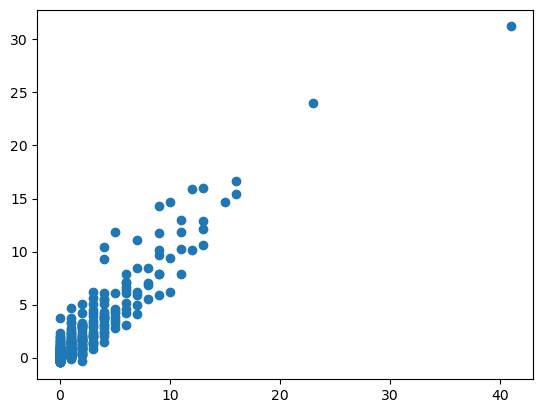

In [47]:
plt.scatter(Y_test,predictions)

C:\Users\kavya\AppData\Local\Temp\ipykernel_3132\1960946261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test-predictions),bins=50);


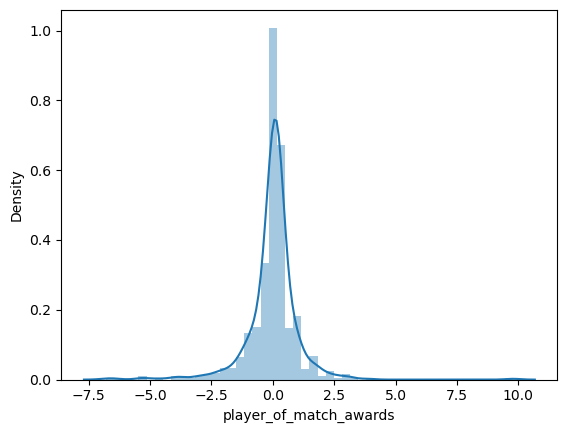

In [48]:
sns.distplot((Y_test-predictions),bins=50);

#### Logistic Regression

In [49]:
X = data[['total_runs', 'total_balls_faced', 'total_wickets_taken', 'total_runs_conceded', 'total_overs_bowled',
              'total_matches_played', 'matches_played_as_batter', 'matches_played_as_bowler','matches_won',	'matches_lost']]
Y = data['player_of_match_awards']

In [50]:
X

,total_runs,total_balls_faced,total_wickets_taken,total_runs_conceded,total_overs_bowled,total_matches_played,matches_played_as_batter,matches_played_as_bowler,matches_won,matches_lost
0,13784,15031,7,681,671,579,579,0,360,219
1,11618,14634,0,0,0,510,510,0,237,273
2,10646,11782,11,538,614,577,577,0,358,219
3,10274,12090,1,32,38,575,575,0,356,219
4,9435,9488,7,205,201,466,466,0,286,180
...,...,...,...,...,...,...,...,...,...,...
1535,0,1,2,34,51,75,75,0,41,34
1536,0,3,0,0,0,40,40,0,11,29
1537,0,2,0,0,0,8,8,0,3,5
1538,0,2,0,0,0,12,12,0,6,6


In [51]:
Y

0       41
1       26
2       23
3       20
4       26
        ..
1535     0
1536     0
1537     0
1538     0
1539     0
Name: player_of_match_awards, Length: 1540, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [54]:
X_train

,total_runs,total_balls_faced,total_wickets_taken,total_runs_conceded,total_overs_bowled,total_matches_played,matches_played_as_batter,matches_played_as_bowler,matches_won,matches_lost
937,77,107,0,0,0,50,50,0,17,33
756,141,143,0,0,0,87,87,0,26,61
1431,3,6,0,0,0,9,9,0,4,5
690,174,265,168,3792,5095,545,545,0,381,164
418,508,628,3,89,110,16,16,0,5,11
...,...,...,...,...,...,...,...,...,...,...
1417,4,13,0,9,7,282,282,0,108,174
75,3011,3672,0,0,0,544,544,0,381,163
599,247,421,0,0,0,157,157,0,56,101
1361,7,6,0,0,0,135,135,0,98,37


In [55]:
X_test

,total_runs,total_balls_faced,total_wickets_taken,total_runs_conceded,total_overs_bowled,total_matches_played,matches_played_as_batter,matches_played_as_bowler,matches_won,matches_lost
389,574,743,110,3090,3340,461,461,0,284,177
622,228,362,0,0,0,401,401,0,155,246
1326,10,32,8,195,256,267,267,0,64,203
1441,3,18,21,453,505,282,282,0,102,180
537,301,318,0,0,0,440,440,0,272,168
...,...,...,...,...,...,...,...,...,...,...
201,1382,2118,9,429,522,509,509,0,291,218
668,186,228,0,0,0,260,260,0,159,101
1041,51,85,9,245,224,49,49,0,24,25
1487,1,7,0,104,80,55,55,0,22,33


In [56]:
Y_train

937     0
756     0
1431    0
690     3
418     0
       ..
1417    0
75      4
599     0
1361    0
863     0
Name: player_of_match_awards, Length: 924, dtype: int64

In [57]:
Y_test

389     4
622     0
1326    0
1441    0
537     0
       ..
201     2
668     0
1041    0
1487    0
447     3
Name: player_of_match_awards, Length: 616, dtype: int64

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lm = LogisticRegression()

In [60]:
lm.fit(X_train,Y_train)

C:\Users\kavya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
print(lm.intercept_)

[ 4.09349349e-03  2.24930287e-05 -2.45974186e-04 -2.60274983e-04
 -2.33953068e-04 -2.61437275e-04 -2.78021889e-04 -2.19694706e-04
 -1.71946770e-04 -2.01534766e-04 -1.52472665e-04 -1.87090048e-04
 -1.89257070e-04 -1.40942879e-04 -1.80603296e-04 -1.85386499e-04
 -1.97099229e-04 -1.42094287e-04 -1.94908176e-04 -1.97228706e-04
 -1.38000025e-04 -1.95281119e-04 -1.42784881e-04]


In [62]:
predictions = lm.predict(X_test)

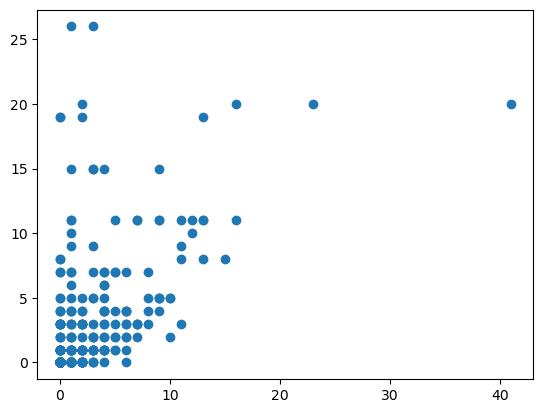

In [63]:
plt.scatter(Y_test,predictions)

C:\Users\kavya\AppData\Local\Temp\ipykernel_3132\1960946261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test-predictions),bins=50);


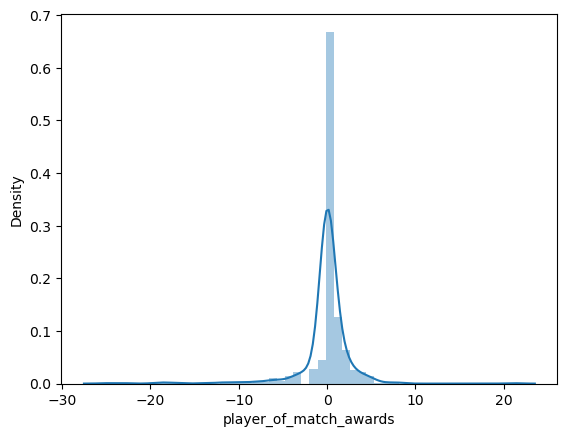

In [64]:
sns.distplot((Y_test-predictions),bins=50);